# Datasets Benchmark

**Summary of this Article** 
- Loading best hyperparameters for each model
- Model training
- Results discussion


## Loading best hyperparameters for each model

TODO... explain this model bench mark

In [36]:
# Import hyperparameters dataset.
import os 
import pandas as pd

In [37]:
sparse_hyper_params = {}
focused_hyper_params = {}
balanced_hyper_params = {}
filtered_hyper_params = {}
sparse_class_hyper_params = {}
balanced_class_hyper_params = {}
for file in os.listdir('hyper_params_results_mcc'):
    if file.endswith('.csv') and 'regression_sparse' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        sparse_hyper_params[file] = df
    elif file.endswith('.csv') and 'regression_focused' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        focused_hyper_params[file] = df
    elif file.endswith('.csv') and 'regression_balanced' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        balanced_hyper_params[file] = df
    elif file.endswith('.csv') and 'filtered' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        filtered_hyper_params[file] = df
    elif file.endswith('.csv') and 'sparse_classifier' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        sparse_class_hyper_params[file] = df
    elif file.endswith('.csv') and 'balanced_classifier' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        balanced_class_hyper_params[file] = df
print('Sparse hyperparameters: {}/8'.format(len(sparse_hyper_params)))
print('Focused hyperparameters: {}/8'.format(len(focused_hyper_params)))
print('Balanced hyperparameters: {}/8'.format(len(balanced_hyper_params)))
print('Filtered hyperparameters: {}/8'.format(len(filtered_hyper_params)))
print('Sparse classifier hyperparameters: {}/8'.format(len(sparse_class_hyper_params)))
print('Balanced classifier hyperparameters: {}/8'.format(len(balanced_class_hyper_params)))
print('\n')
# print('Sparse hyper params:\n')
# for key in sparse_hyper_params.keys():
#     print(key, ':\n ',sparse_hyper_params[key])
# print('Focused hyper params:\n')
# for key in focused_hyper_params.keys():
#     print(key, ':\n',focused_hyper_params[key])
# print('Boolean hyper params:\n')
# for key in sparse_class_hyper_params.keys():
#     print(key, ':\n',sparse_class_hyper_params[key])

Sparse hyperparameters: 8/8
Focused hyperparameters: 8/8
Balanced hyperparameters: 8/8
Filtered hyperparameters: 8/8
Sparse classifier hyperparameters: 8/8
Balanced classifier hyperparameters: 8/8




In [38]:
import ast
def get_hyper_params_from_df(df):
    output = {}
    for row in df.iterrows():
        if row[1]['params'] != 'value':
            try:
                output[row[1]['params']] = ast.literal_eval(row[1]['value'])
            except :
                output[row[1]['params']] = row[1]['value']
    return output
get_hyper_params_from_df(focused_hyper_params['params_mlp_regression_focused_max_u.csv'])

{'hidden_size': 34,
 'n_layers': 3,
 'dropout': 0.0030412321477918842,
 'activation': 'relu',
 'optimizer': 'sgd',
 'lr': 9.741292351005151e-05,
 'epochs': 55,
 'batch_size': 8,
 'classifier': False}

## Loading the data

In [39]:
import sys
sys.path.append('..');from thesis_package import aimodels as my_ai, utils, metrics
from copy import deepcopy
import sklearn.metrics
from sklearn.model_selection import train_test_split

exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])

In [40]:
# Regression data sparse
y_max_u_sparse = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_constr.csv').drop(columns=['timestamps'])
y_min_u_sparse = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_constr.csv').drop(columns=['timestamps'])

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_max_u_sparse, test_size=0.2, scaling=True)
data_max_u_sparse = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_min_u_sparse, test_size=0.2, scaling=True)
data_min_u_sparse = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [41]:
# Classification data sparse
y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_sparse_bool_constr.csv').drop(columns=['timestamps'])
y_min_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_sparse_bool_constr.csv').drop(columns=['timestamps'])
y_max_u_bool = y_max_u_bool[utils.cols_with_positive_values(y_max_u_bool)]
y_min_u_bool = y_min_u_bool[utils.cols_with_positive_values(y_min_u_bool)]

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_max_u_bool, test_size=0.2, scaling=True)
data_max_u_bool = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_min_u_bool, test_size=0.2, scaling=True)
data_min_u_bool = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [42]:
# Filtered data
y_max_u_filtered = deepcopy(y_max_u_sparse[utils.cols_with_positive_values(y_max_u_bool)])
y_min_u_filtered = deepcopy(y_min_u_sparse[utils.cols_with_positive_values(y_min_u_bool)])
train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_max_u_filtered, test_size=0.2, scaling=True)
data_max_u_filtered = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_min_u_filtered, test_size=0.2, scaling=True)
data_min_u_filtered = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [43]:
# Print the size of the classiciation testing data and the filtered testing data
print('Classification data size: ', data_max_u_bool['y_test'].shape)
print('Regression data size: ', data_max_u_filtered['y_test'].shape)
print('Positive in classification data: ', utils.count_positives_class(data_max_u_bool['y_test']))
#unscaled_y_test = pd.DataFrame(data_max_u_filtered['scaler']['y'].inverse_transform(data_max_u_filtered['y_test']), columns=data_max_u_filtered['y_test'].columns)
unscaled_y_test = data_max_u_filtered['y_test'] * data_max_u_sparse['scaler']['y']
print('Positive in regression data: ', utils.count_positives_reg(unscaled_y_test, utils.compute_threshold(y_max_u_sparse)))
print('Theshhold: ', utils.compute_threshold(y_max_u_sparse))
# Same for min_u
print('\n')
print('Classification data size: ', data_min_u_bool['y_test'].shape)
print('Regression data size: ', data_min_u_filtered['y_test'].shape)
print('Positive in classification data: ', utils.count_positives_class(data_min_u_bool['y_test']))
#unscaled_y_test = pd.DataFrame(data_min_u_filtered['scaler']['y'].inverse_transform(data_min_u_filtered['y_test']), columns=data_min_u_filtered['y_test'].columns)
unscaled_y_test = data_min_u_filtered['y_test'] * data_min_u_sparse['scaler']['y']
print('Positive in regression data: ', utils.count_positives_reg(unscaled_y_test, utils.compute_threshold(y_min_u_sparse)))
print('Theshhold: ', utils.compute_threshold(y_min_u_sparse))

Classification data size:  (9044, 11)
Regression data size:  (9044, 11)
Positive in classification data:  4949.0
Positive in regression data:  4949
Theshhold:  0.0016733255333549746


Classification data size:  (9044, 10)
Regression data size:  (9044, 10)
Positive in classification data:  6022.0
Positive in regression data:  6022
Theshhold:  0.002022118621573741


In [44]:
# Regresison data focused
y_max_u_focused = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_focused_constr.csv')
exogenous_data_focused_max_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_max_focused.csv').drop(columns=['date'])
y_min_u_focused = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_focused_constr.csv')
exogenous_data_focused_min_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_min_focused.csv').drop(columns=['date'])

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_focused_max_u, y_max_u_focused, test_size=0.2, scaling=True)
data_max_u_focused = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_focused_min_u, y_min_u_focused, test_size=0.2, scaling=True)
data_min_u_focused = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [45]:
# Regresison data balanced
y_max_u_balanced = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_balanced_constr.csv')
exogenous_data_balanced_max_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_max_balanced.csv').drop(columns=['date'])
y_min_u_balanced = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_balanced_constr.csv')
exogenous_data_balanced_min_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_min_balanced.csv').drop(columns=['date'])

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_balanced_max_u, y_max_u_balanced, test_size=0.2, scaling=True)
data_max_u_balanced = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_balanced_min_u, y_min_u_balanced, test_size=0.2, scaling=True)
data_min_u_balanced = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [46]:
# Classification data balanced
y_max_u_balanced_class = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_balanced_bool_constr.csv')
exogenous_data_balanced_max_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_max_balanced.csv').drop(columns=['date'])
y_min_u_balanced_class = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_balanced_bool_constr.csv')
exogenous_data_balanced_min_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_min_balanced.csv').drop(columns=['date'])
y_max_u_balanced_class = y_max_u_balanced_class[utils.cols_with_positive_values(y_max_u_balanced_class)]
y_min_u_balanced_class = y_min_u_balanced_class[utils.cols_with_positive_values(y_min_u_balanced_class)]

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_balanced_max_u, y_max_u_balanced_class, test_size=0.2, scaling=True)
data_max_u_bool_balanced = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_balanced_min_u, y_min_u_balanced_class, test_size=0.2, scaling=True)
data_min_u_bool_balanced = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

Now for a quick sanity check:

In [47]:
utils.check_positive_count(data_max_u_filtered['y_test']* data_max_u_filtered['scaler']['y'], data_max_u_bool['y_test'], utils.compute_threshold(y_max_u_sparse), experiment='max_u')
utils.check_positive_count(data_min_u_filtered['y_test']* data_min_u_filtered['scaler']['y'], data_min_u_bool['y_test'], utils.compute_threshold(y_min_u_sparse), experiment='min_u')
utils.check_negative_count(data_max_u_filtered['y_test']* data_max_u_filtered['scaler']['y'], data_max_u_bool['y_test'], utils.compute_threshold(y_max_u_sparse), experiment='max_u')
utils.check_negative_count(data_min_u_filtered['y_test']* data_min_u_filtered['scaler']['y'], data_min_u_bool['y_test'], utils.compute_threshold(y_min_u_sparse), experiment='min_u')

Positive count in classification data max_u : 4949.0
Positive count in regression data max_u with threshold 0.0016733255333549746 : 4949


Positive count in classification data min_u : 6022.0
Positive count in regression data min_u with threshold 0.002022118621573741 : 6022


Negative count in classification data max_u : 94535.0
Negative count in regression data max_u with threshold 0.0016733255333549746 : 94535


Negative count in classification data min_u : 84418.0
Negative count in regression data min_u with threshold 0.002022118621573741 : 84418




In [48]:
utils.check_positive_count(data_max_u_filtered['y_test'] * data_max_u_filtered['scaler']['y'], data_max_u_bool['y_test'], utils.compute_threshold(y_max_u_sparse), experiment='max_u')

Positive count in classification data max_u : 4949.0
Positive count in regression data max_u with threshold 0.0016733255333549746 : 4949




## Training models
In this section the models will be trained with the hyperparameters loaded above. All the models will be stored in the same `Context` object for later evaluation. The `Context` object is a class that stores all the models and their respective hyperparameters. The `Context` object is defined in the `aimodels.py` file. The `Context` object is defined as follows:

In [49]:
reg_models = ['lr', 'gb', 'xgb', 'svr', 'mlp']
class_models =  ['gb', 'xgb', 'svr', 'mlp']
max_u_threshold = utils.compute_threshold(y_max_u_sparse)
min_u_threshold = utils.compute_threshold(y_min_u_sparse)

### Max Voltage

In [50]:
sparse_hyper_params.keys()

dict_keys(['params_gradient_boost_regression_sparse_max_u.csv', 'params_gradient_boost_regression_sparse_min_u.csv', 'params_mlp_regression_sparse_max_u.csv', 'params_mlp_regression_sparse_min_u.csv', 'params_support_vector_regression_sparse_max_u.csv', 'params_support_vector_regression_sparse_min_u.csv', 'params_xgboost_regression_sparse_max_u.csv', 'params_xgboost_regression_sparse_min_u.csv'])

Training max_u regression sparse


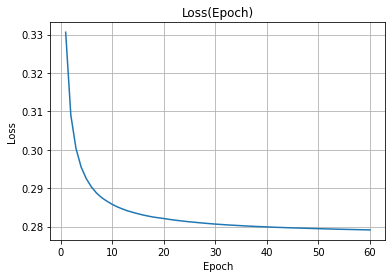

In [51]:
# max_u regression sparse
if 'max_u_regressor_sparse.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression sparse')
    # Linear Regression
    regressor_max_u = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u.fit(data=data_max_u_sparse)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_gradient_boost_regression_sparse_max_u.csv'])
    regressor_max_u.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_xgboost_regression_sparse_max_u.csv']) 
    regressor_max_u.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_support_vector_regression_sparse_max_u.csv'])
    regressor_max_u.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_mlp_regression_sparse_max_u.csv'])
    hyper_params['input_size'] = data_max_u_sparse['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_sparse['y_train'].shape[1]
    regressor_max_u.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    utils.serialize_object('pickles\dataset_benchmark\max_u_regressor_sparse', regressor_max_u)
else:
    print('Loading max_u regression sparse') 
    regressor_max_u = utils.deserialize_object('pickles\dataset_benchmark\max_u_regressor_sparse')

testing_data = {'max_u_regressor_sparse': {}}
for model, strategy in zip(reg_models, regressor_max_u.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_max_u_sparse['y_test'].columns)
    testing_data['max_u_regressor_sparse'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_regressor_sparse'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_regressor_sparse'][model]['real'] = deepcopy(data_max_u_sparse['y_test'].reset_index(drop=True))
    

,ext_grid,bus_1,bus_2,bus_3,bus_4,bus_5,bus_6,bus_7,bus_8,bus_9,...,bus_30,bus_31,bus_17,bus_21,bus_24,bus_18,bus_23,bus_27,bus_32,bus_33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.991541,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.965330,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.957302,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750065,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.959050,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589455,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


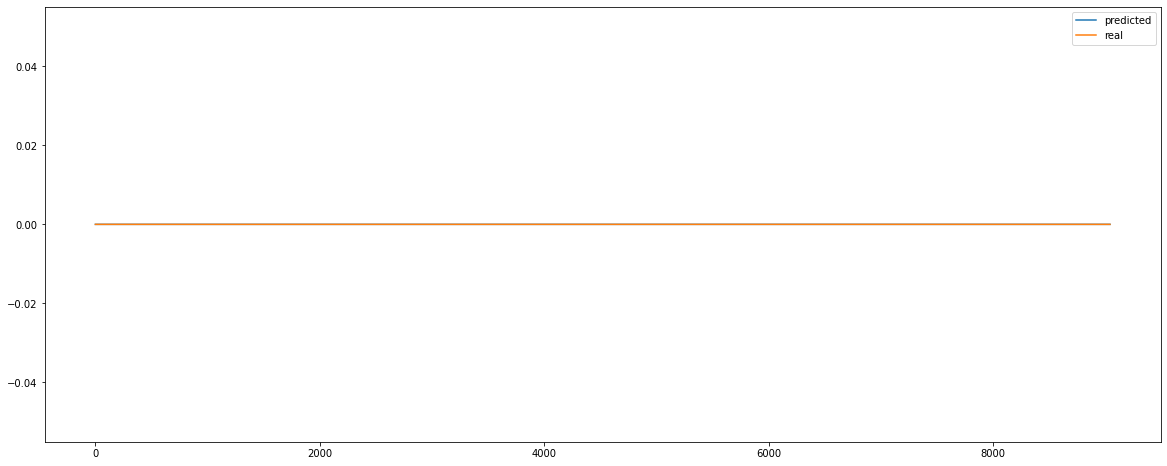

In [52]:

# figure size of the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
testing_data['max_u_regressor_sparse']['mlp']['predicted']['bus_1'].plot()
testing_data['max_u_regressor_sparse']['mlp']['real']['bus_1'].plot()
# plot a line with the threshold
# Add legend
plt.legend(['predicted', 'real'])
testing_data['max_u_regressor_sparse']['mlp']['predicted']

In [53]:
metric = metrics.Metrics()
metric.get_prediction_scores(testing_data['max_u_regressor_sparse']['mlp']['real'], testing_data['max_u_regressor_sparse']['mlp']['predicted'], max_u_threshold)

true_positives_ctr:  5528
true_negatives_ctr:  217049
false_positives_ctr:  7
false_negatives_ctr:  84912
32809591956366086400


Training max_u regression focused
[10:35:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:35:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learn

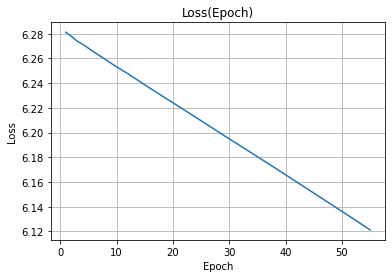

In [55]:
# max_u regression focused
if 'max_u_regressor_focused.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression focused')
    # Linear Regression
    regressor_max_u_focused = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_gradient_boost_regression_focused_max_u.csv'])
    regressor_max_u_focused.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_xgboost_regression_focused_max_u.csv']) 
    regressor_max_u_focused.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_support_vector_regression_focused_max_u.csv'])
    regressor_max_u_focused.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_mlp_regression_focused_max_u.csv'])
    hyper_params['input_size'] = data_max_u_focused['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_focused['y_train'].shape[1]
    regressor_max_u_focused.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    utils.serialize_object('pickles\dataset_benchmark\max_u_regressor_focused', regressor_max_u_focused)
else: 
    print('Loading max_u regression focused')
    regressor_max_u_focused = utils.deserialize_object('pickles\dataset_benchmark\\max_u_regressor_focused')

testing_data['max_u_regressor_focused'] = {}
for model, strategy in zip(reg_models, regressor_max_u_focused.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    testing_data['max_u_regressor_focused'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_regressor_focused'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_regressor_focused'][model]['real'] = deepcopy(data_max_u_sparse['y_test'].reset_index(drop=True))
    

Training max_u regression filtered


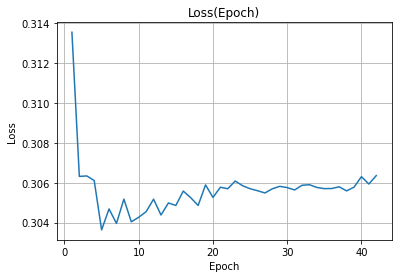

In [56]:
# max_u regression filtered
if 'max_u_filtered_regressor.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression filtered')
    # Linear Regression
    regressor_max_u_filtered = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_gradient_boost_regression_filtered_max_u.csv'])
    regressor_max_u_filtered.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_xgboost_regression_filtered_max_u.csv'])
    regressor_max_u_filtered.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_support_vector_regression_filtered_max_u.csv'])
    regressor_max_u_filtered.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_mlp_regression_filtered_max_u.csv'])
    hyper_params['input_size'] = data_max_u_filtered['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_filtered['y_train'].shape[1]
    regressor_max_u_filtered.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    utils.serialize_object('pickles\dataset_benchmark\max_u_filtered_regressor', regressor_max_u_filtered)
else: 
    print('Loading max_u filtered regression')
    regressor_max_u_filtered = utils.deserialize_object('pickles\dataset_benchmark\max_u_filtered_regressor')

testing_data['max_u_filtered_regressor'] = {}
for model, strategy in zip(reg_models, regressor_max_u_filtered.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_max_u_filtered['y_test'].columns)
    testing_data['max_u_filtered_regressor'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_filtered_regressor'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_filtered_regressor'][model]['real'] = deepcopy(data_max_u_sparse['y_test'][utils.cols_with_positive_values(prediction)].reset_index(drop=True))

In [57]:
strategy = regressor_max_u_filtered.strategies[0]
prediction = strategy.predict(data=data_max_u_sparse)
prediction.shape


(9044, 11)

Training max_u regression balanced


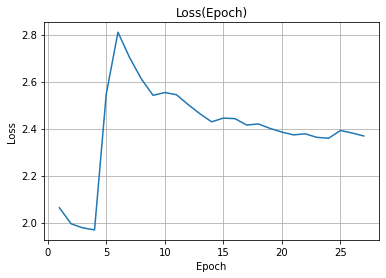

In [58]:
# max u regression balanced
if 'max_u_regressor_balanced.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression balanced')
    # Linear Regression
    regressor_max_u_balanced = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_gradient_boost_regression_balanced_max_u.csv'])
    regressor_max_u_balanced.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_xgboost_regression_balanced_max_u.csv'])
    regressor_max_u_balanced.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_support_vector_regression_balanced_max_u.csv'])
    regressor_max_u_balanced.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_mlp_regression_balanced_max_u.csv'])
    hyper_params['input_size'] = data_max_u_balanced['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_balanced['y_train'].shape[1]
    regressor_max_u_balanced.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    utils.serialize_object('pickles\dataset_benchmark\max_u_regressor_balanced', regressor_max_u_balanced)
else: 
    print('Loading max_u regression balanced')
    regressor_max_u_balanced = utils.deserialize_object('pickles\dataset_benchmark\max_u_regressor_balanced')

testing_data['max_u_regressor_balanced'] = {}
for model, strategy in zip(reg_models, regressor_max_u_balanced.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    testing_data['max_u_regressor_balanced'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_regressor_balanced'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_regressor_balanced'][model]['real'] = deepcopy(data_max_u_sparse['y_test'].reset_index(drop=True))

Training max_u classification


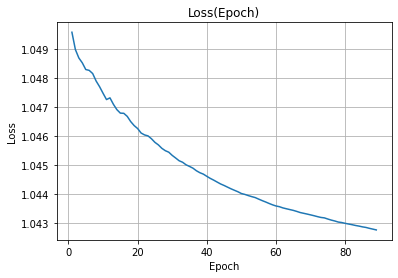

In [59]:
# max_u classification
if 'max_u_classifier.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u classification')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_gradient_boost_sparse_classifier_max_u.csv'])
    classifier_max_u = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_max_u.fit(data=data_max_u_bool)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_xgboost_sparse_classifier_max_u.csv'])
    classifier_max_u.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_max_u.fit(data=data_max_u_bool)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_support_vector_sparse_classifier_max_u.csv'])
    classifier_max_u.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_max_u.fit(data=data_max_u_bool)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_mlp_sparse_classifier_max_u.csv'])
    hyper_params['input_size'] = data_max_u_bool['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_bool['y_train'].shape[1]
    classifier_max_u.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    classifier_max_u.fit(data=data_max_u_bool)
    utils.serialize_object('pickles\dataset_benchmark\max_u_classifier', classifier_max_u)
else: 
    print('Loading max_u classification')
    classifier_max_u = utils.deserialize_object('pickles\dataset_benchmark\max_u_classifier')

testing_data['max_u_classifier'] = {}
for model, strategy in zip(class_models, classifier_max_u.strategies):
    prediction = strategy.predict(data=data_max_u_bool)
    testing_data['max_u_classifier'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_classifier'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_classifier'][model]['real'] = deepcopy(data_max_u_bool['y_test'].reset_index(drop=True))

<AxesSubplot:>

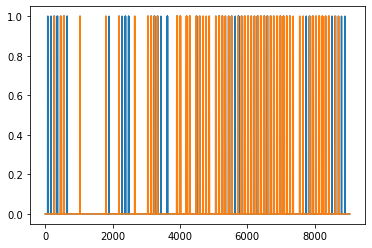

In [60]:
testing_data['max_u_classifier']['xgb']['predicted']['bus_15'].plot()
testing_data['max_u_classifier']['xgb']['real']['bus_15'].plot()

Training max_u classification balanced


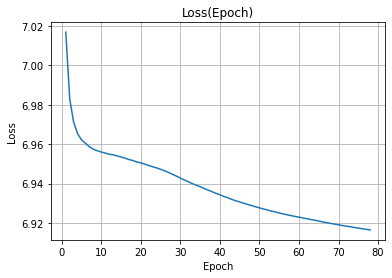

In [61]:
# max_u classification balanced
if 'max_u_classifier_balanced.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u classification balanced')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_gradient_boost_balanced_classifier_max_u.csv'])
    classifier_max_u_balanced = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_max_u_balanced.fit(data=data_max_u_bool_balanced)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_xgboost_balanced_classifier_max_u.csv'])
    classifier_max_u_balanced.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_max_u_balanced.fit(data=data_max_u_bool_balanced)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_support_vector_balanced_classifier_max_u.csv'])
    classifier_max_u_balanced.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_max_u_balanced.fit(data=data_max_u_bool_balanced)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_mlp_balanced_classifier_max_u.csv'])
    hyper_params['input_size'] = data_max_u_bool_balanced['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_bool_balanced['y_train'].shape[1]
    classifier_max_u_balanced.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    classifier_max_u_balanced.fit(data=data_max_u_bool_balanced)
    utils.serialize_object('pickles\dataset_benchmark\max_u_classifier_balanced', classifier_max_u_balanced)
else: 
    print('Loading max_u classification balanced')
    classifier_max_u_balanced = utils.deserialize_object('pickles\dataset_benchmark\max_u_classifier_balanced')

testing_data['max_u_classifier_balanced'] = {}
for model, strategy in zip(class_models, classifier_max_u_balanced.strategies):
    prediction = strategy.predict(data=data_max_u_bool)
    testing_data['max_u_classifier_balanced'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_classifier_balanced'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_classifier_balanced'][model]['real'] = deepcopy(data_max_u_bool['y_test'].reset_index(drop=True))

In [62]:
classifier_max_u_balanced.strategies

### Min u regression training


Training min_u regression sparse


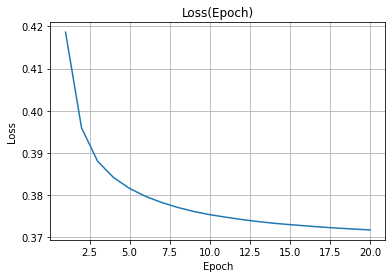

In [63]:
# min_u regression sparse
if 'min_u_regressor_sparse.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression sparse')
    # Linear Regression
    regressor_min_u = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u.fit(data=data_min_u_sparse)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_gradient_boost_regression_sparse_min_u.csv'])
    regressor_min_u.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_xgboost_regression_sparse_min_u.csv'])
    regressor_min_u.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_support_vector_regression_sparse_min_u.csv'])
    regressor_min_u.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_mlp_regression_sparse_min_u.csv'])
    hyper_params['input_size'] = data_min_u_sparse['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_sparse['y_train'].shape[1]
    regressor_min_u.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    utils.serialize_object('pickles\dataset_benchmark\min_u_regressor_sparse', regressor_min_u)
else:
    print('Loading min_u regression sparse')
    regressor_min_u = utils.deserialize_object('pickles\dataset_benchmark\min_u_regressor_sparse')

testing_data['min_u_regressor_sparse'] = {}
for model, strategy in zip(reg_models, regressor_min_u.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    testing_data['min_u_regressor_sparse'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_regressor_sparse'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_regressor_sparse'][model]['real'] = deepcopy(data_min_u_sparse['y_test'].reset_index(drop=True))

Training min_u regression focused
[11:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:23:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learn

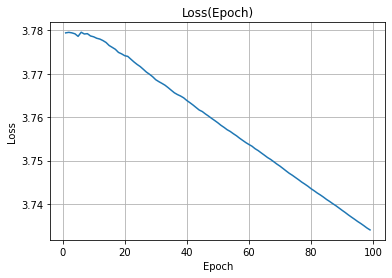

In [64]:
# min_u regression focused
if 'min_u_regressor_focused.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression focused')
    # Linear Regression
    regressor_min_u_focused = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_gradient_boost_regression_focused_min_u.csv'])
    regressor_min_u_focused.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_xgboost_regression_focused_min_u.csv'])
    regressor_min_u_focused.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_support_vector_regression_focused_min_u.csv'])
    regressor_min_u_focused.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_mlp_regression_focused_min_u.csv'])
    hyper_params['input_size'] = data_min_u_focused['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_focused['y_train'].shape[1]
    regressor_min_u_focused.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    utils.serialize_object('pickles\dataset_benchmark\min_u_regressor_focused', regressor_min_u_focused)
else:
    print('Loading min_u regression focused')
    regressor_min_u_focused = utils.deserialize_object('pickles\dataset_benchmark\min_u_regressor_focused')

testing_data['min_u_regressor_focused'] = {}
for model, strategy in zip(reg_models, regressor_min_u_focused.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    testing_data['min_u_regressor_focused'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_regressor_focused'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_regressor_focused'][model]['real'] = deepcopy(data_min_u_sparse['y_test'].reset_index(drop=True))

Training min_u regression filtered


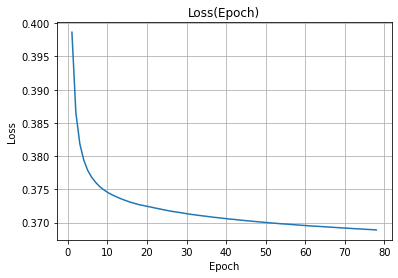

In [65]:
# min u regression filtered
if 'min_u_filtered_regressor.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression filtered')
    # Linear Regression
    regressor_min_u_filtered = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_gradient_boost_regression_filtered_min_u.csv'])
    regressor_min_u_filtered.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_xgboost_regression_filtered_min_u.csv'])
    regressor_min_u_filtered.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_support_vector_regression_filtered_min_u.csv'])
    regressor_min_u_filtered.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_mlp_regression_filtered_min_u.csv'])
    hyper_params['input_size'] = data_min_u_filtered['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_filtered['y_train'].shape[1]
    regressor_min_u_filtered.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    utils.serialize_object('pickles\dataset_benchmark\min_u_filtered_regressor', regressor_min_u_filtered)
else: 
    print('Loading min_u filtered regression')
    regressor_min_u_filtered = utils.deserialize_object('pickles\dataset_benchmark\min_u_filtered_regressor')

testing_data['min_u_filtered_regressor'] = {}
for model, strategy in zip(reg_models, regressor_min_u_filtered.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_min_u_filtered['y_test'].columns)
    testing_data['min_u_filtered_regressor'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_filtered_regressor'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_filtered_regressor'][model]['real'] = deepcopy(data_min_u_sparse['y_test'][utils.cols_with_positive_values(prediction)].reset_index(drop=True))

Training min_u regression balanced


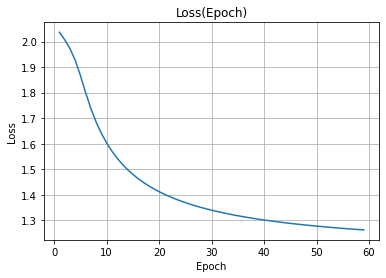

In [66]:
# min u regression balanced
if 'min_u_regressor_balanced.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression balanced')
    # Linear Regression
    regressor_min_u_balanced = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_gradient_boost_regression_balanced_min_u.csv'])
    regressor_min_u_balanced.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_xgboost_regression_balanced_min_u.csv'])
    regressor_min_u_balanced.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_support_vector_regression_balanced_min_u.csv'])
    regressor_min_u_balanced.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_mlp_regression_balanced_min_u.csv'])
    hyper_params['input_size'] = data_min_u_balanced['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_balanced['y_train'].shape[1]
    regressor_min_u_balanced.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    utils.serialize_object('pickles\dataset_benchmark\min_u_regressor_balanced', regressor_min_u_balanced)
else: 
    print('Loading min_u regression balanced')
    regressor_min_u_balanced = utils.deserialize_object('pickles\dataset_benchmark\min_u_regressor_balanced')

testing_data['min_u_regressor_balanced'] = {}
for model, strategy in zip(reg_models, regressor_min_u_balanced.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    testing_data['min_u_regressor_balanced'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_regressor_balanced'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_regressor_balanced'][model]['real'] = deepcopy(data_min_u_sparse['y_test'].reset_index(drop=True))

Training min_u classification


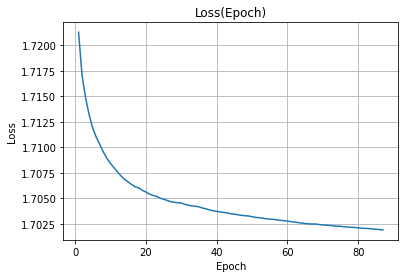

In [67]:
# min_u classification
if 'min_u_classifier.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u classification')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_gradient_boost_sparse_classifier_min_u.csv'])
    classifier_min_u = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_min_u.fit(data=data_min_u_bool)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_xgboost_sparse_classifier_min_u.csv'])
    classifier_min_u.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_min_u.fit(data=data_min_u_bool)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_support_vector_sparse_classifier_min_u.csv'])
    classifier_min_u.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_min_u.fit(data=data_min_u_bool)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_mlp_sparse_classifier_min_u.csv'])
    hyper_params['input_size'] = data_min_u_bool['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_bool['y_train'].shape[1]
    classifier_min_u.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    classifier_min_u.fit(data=data_min_u_bool)
    utils.serialize_object('pickles\dataset_benchmark\min_u_classifier', classifier_min_u)
else: 
    print('Loading min_u classification')
    classifier_min_u = utils.deserialize_object('pickles\dataset_benchmark\min_u_classifier')

testing_data['min_u_classifier'] = {}
for model, strategy in zip(class_models, classifier_min_u.strategies):
    prediction = strategy.predict(data=data_min_u_bool)
    testing_data['min_u_classifier'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_classifier'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_classifier'][model]['real'] = deepcopy(data_min_u_bool['y_test'].reset_index(drop=True))

In [68]:
classifier_min_u.strategies

Training min_u classification balanced


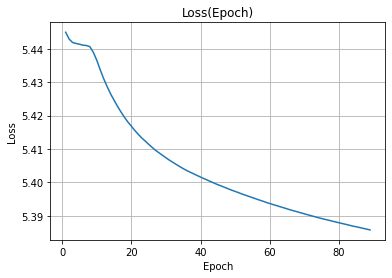

In [69]:
# min u classification balanced
if 'min_u_classifier_balanced.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u classification balanced')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_gradient_boost_balanced_classifier_min_u.csv'])
    classifier_min_u_balanced = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_min_u_balanced.fit(data=data_min_u_bool_balanced)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_xgboost_balanced_classifier_min_u.csv'])
    classifier_min_u_balanced.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_min_u_balanced.fit(data=data_min_u_bool_balanced)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_support_vector_balanced_classifier_min_u.csv'])
    classifier_min_u_balanced.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_min_u_balanced.fit(data=data_min_u_bool_balanced)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_mlp_balanced_classifier_min_u.csv'])
    hyper_params['input_size'] = data_min_u_bool_balanced['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_bool_balanced['y_train'].shape[1]
    classifier_min_u_balanced.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    classifier_min_u_balanced.fit(data=data_min_u_bool_balanced)
    utils.serialize_object('pickles\dataset_benchmark\min_u_classifier_balanced', classifier_min_u_balanced)
else: 
    print('Loading min_u classification balanced')
    classifier_min_u_balanced = utils.deserialize_object('pickles\dataset_benchmark\min_u_classifier_balanced')

testing_data['min_u_classifier_balanced'] = {}
for model, strategy in zip(class_models, classifier_min_u_balanced.strategies):
    prediction = strategy.predict(data=data_min_u_bool)
    testing_data['min_u_classifier_balanced'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_classifier_balanced'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_classifier_balanced'][model]['real'] = deepcopy(data_min_u_bool['y_test'].reset_index(drop=True))

## Results
In this section the results of the training and testing are presented and compared. The main objectives of this experience is to compare the performance of the regression models in terms of the hybrid metrics confusion matrix and the hybrid metrics rmse. The comparisons will be the following:
- Compare the confusion matrices of the classification models and the regression models evaluate with the hybrid metrics.
- Compare the error results of the regression models trained with the focused dataset and the sparse dataset. 

In [70]:
for experience in testing_data.keys():
    print(experience,': ', testing_data[experience].keys())

max_u_regressor_sparse :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
max_u_regressor_focused :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
max_u_filtered_regressor :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
max_u_regressor_balanced :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
max_u_classifier :  dict_keys(['gb', 'xgb', 'svr', 'mlp'])
max_u_classifier_balanced :  dict_keys(['gb', 'xgb', 'svr', 'mlp'])
min_u_regressor_sparse :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
min_u_regressor_focused :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
min_u_filtered_regressor :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
min_u_regressor_balanced :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
min_u_classifier :  dict_keys(['gb', 'xgb', 'svr', 'mlp'])
min_u_classifier_balanced :  dict_keys(['gb', 'xgb', 'svr', 'mlp'])


In [71]:
# Testing all models: Function that receives a dict with the real and predicted values, and outputs a dataframe with the results of the metrics.
# Accumulate all the classifications for each bus.
tp, tn, fp, fn = 0, 0, 0, 0
for bus in testing_data['max_u_regressor_sparse']['mlp']['predicted'].columns:
    # Compute tp, tn, fp, fn
    tp += sum((testing_data['max_u_regressor_sparse']['mlp']['predicted'][bus] == 1) & (testing_data['max_u_regressor_sparse']['mlp']['real'][bus] == 1))
    tn += sum((testing_data['max_u_regressor_sparse']['mlp']['predicted'][bus] == 0) & (testing_data['max_u_regressor_sparse']['mlp']['real'][bus] == 0))
    fp += sum((testing_data['max_u_regressor_sparse']['mlp']['predicted'][bus] == 1) & (testing_data['max_u_regressor_sparse']['mlp']['real'][bus] == 0))
    fn += sum((testing_data['max_u_regressor_sparse']['mlp']['predicted'][bus] == 0) & (testing_data['max_u_regressor_sparse']['mlp']['real'][bus] == 1))
print('{} + {} = {} = {} possible positive values.'.format(tp, fn, tp+fn, testing_data['max_u_regressor_sparse']['mlp']['real'].sum().sum()))
print('{} + {} = {} = {} possible negative values.'.format(tn, fp, tn+fp, testing_data['max_u_regressor_sparse']['mlp']['real'].shape[0]*testing_data['max_u_regressor_sparse']['mlp']['real'].shape[1] - testing_data['max_u_regressor_sparse']['mlp']['real'].sum().sum()))


0 + 0 = 0 = 1590.4300280519656 possible positive values.
217047 + 77879 = 294926 = 305905.56997194805 possible negative values.


In [73]:
from beepy import beep; beep(sound=6)

In [75]:
from numpy import sqrt 
# Build a multi-index dataframe with the results of the metrics. The first index is the testing_data.keys(), the second index are the tp, tn, fp, fn, and the columns are the models.
columns = ['tp', 'tn', 'fp', 'fn', '(hybrid)accuracy', '(hybrid)precision', '(hybrid)recall', '(hybrid)f1']
index = pd.MultiIndex.from_product([testing_data.keys(), ['lr', 'gb', 'xgb', 'svr', 'mlp']], names=['experiment', 'class'])
df = pd.DataFrame(index=index, columns=columns)
classifier_experiments =[experiment for experiment in testing_data.keys() if 'classifier' in experiment.split('_')] # TODO confirm this
regressor_experiments = [experiment for experiment in testing_data.keys() if 'regressor' in experiment.split('_')]
# Classifier experiments
class_metrics = metrics.Metrics()
tp, tn, fp, fn = 0, 0, 0, 0
for experiment in classifier_experiments:
    for model in testing_data[experiment].keys():
        for bus in testing_data[experiment][model]['predicted'].columns:
            try:
                tp += sum((testing_data[experiment][model]['predicted'][bus] == 1) & (testing_data[experiment][model]['real'][bus] == 1))
                tn += sum((testing_data[experiment][model]['predicted'][bus] == 0) & (testing_data[experiment][model]['real'][bus] == 0))
                fp += sum((testing_data[experiment][model]['predicted'][bus] == 1) & (testing_data[experiment][model]['real'][bus] == 0))
                fn += sum((testing_data[experiment][model]['predicted'][bus] == 0) & (testing_data[experiment][model]['real'][bus] == 1))
            except: 
                print('In the experiment ', experiment, ' and model ', model, ' there was a problem with bus: ', bus)
                if not testing_data[experiment][model]['real'][bus].any():
                    print('Bus {} has no positive data points. Just ignore the little shit.'.format(bus))    
        df.loc[(experiment, model), 'tp'] = tp
        df.loc[(experiment, model), 'tn'] = tn
        df.loc[(experiment, model), 'fp'] = fp
        df.loc[(experiment, model), 'fn'] = fn
        #print('Experiment: {}, model: {}, tp: {}, tn: {}, fp: {}, fn: {}'.format(experiment, model, tp, tn, fp, fn))
        recall = class_metrics.compute_recall(tp, fn)
        precision = class_metrics.compute_precision(tp, fp)
        f1 = class_metrics.compute_f1(recall, precision)
        accuracy = class_metrics.compute_accuracy(tp, tn, fp, fn)
        mcc = class_metrics.compute_mcc(tp, tn, fp, fn)
        df.loc[(experiment, model), '(hybrid)accuracy'] = accuracy
        df.loc[(experiment, model), '(hybrid)precision'] = precision
        df.loc[(experiment, model), '(hybrid)recall'] = recall
        df.loc[(experiment, model), '(hybrid)f1'] = f1
        df.loc[(experiment, model), '(hybrid)mcc'] = mcc
        # print('Experiment: {}, model: {}, accuracy: {}, precision: {}, recall: {}, f1: {}'.format(experiment, model, accuracy, precision, recall, f1))
        tp = 0
        tn = 0
        fp = 0
        fn = 0 
# Regressor experiments
_threshold = lambda experiment: max_u_threshold / data_max_u_balanced['scaler']['y'] if 'max_u' in experiment else min_u_threshold/ data_min_u_balanced['scaler']['y']
# _threshold = lambda experiment: max_u_threshold if 'max_u' in experiment else min_u_threshold
for experiment in regressor_experiments:
    for model in testing_data[experiment].keys():
        # try:
        threshold = _threshold(experiment)
        print('Experiment: {}, model: {}, threshold: {}'.format(experiment, model, threshold))
        hybrid_metrics = metrics.Metrics()
        hybrid_metrics.get_prediction_scores(testing_data[experiment][model]['predicted'], testing_data[experiment][model]['real'], threshold=threshold)
        df.loc[(experiment, model), 'tp'] = hybrid_metrics.true_positives_ctr
        df.loc[(experiment, model), 'tn'] = hybrid_metrics.true_negatives_ctr
        df.loc[(experiment, model), 'fp'] = hybrid_metrics.false_positives_ctr
        df.loc[(experiment, model), 'fn'] = hybrid_metrics.false_negatives_ctr
        df.loc[(experiment, model), '(hybrid)accuracy'] = hybrid_metrics.hybrid_accuracy
        df.loc[(experiment, model), '(hybrid)precision'] = hybrid_metrics.hybrid_precision
        df.loc[(experiment, model), '(hybrid)recall'] = hybrid_metrics.hybrid_recall
        df.loc[(experiment, model), '(hybrid)f1'] = hybrid_metrics.hybrid_f1
        df.loc[(experiment, model), '(hybrid)mcc'] = hybrid_metrics.hybrid_mcc
        # print('Experiment: {}, model: {}, tp: {}, tn: {}, fp: {}, fn: {}'.format(experiment, model, hybrid_metrics.true_positives_ctr, hybrid_metrics.true_negatives_ctr, hybrid_metrics.false_positives_ctr, hybrid_metrics.false_negatives_ctr))
        # print('Experiment: {}, model: {}, accuracy: {}, precision: {}, recall: {}, f1: {}'.format(experiment, model, hybrid_metrics.hybrid_accuracy_rmse, hybrid_metrics.hybrid_precision_rmse, hybrid_metrics.hybrid_recall_rmse, hybrid_metrics.hybrid_f1_rmse))
        # except(Exception) as e:
        #     print('In the experiment ', experiment, ' and model ', model, ' there was a problem')
        #     print(e)

Experiment: max_u_regressor_sparse, model: lr, threshold: 0.05260425830867303
true_positives_ctr:  3151
true_negatives_ctr:  297203
false_positives_ctr:  5344
false_negatives_ctr:  1798
3803175167752364985
Experiment: max_u_regressor_sparse, model: gb, threshold: 0.05260425830867303
true_positives_ctr:  3410
true_negatives_ctr:  299857
false_positives_ctr:  2690
false_negatives_ctr:  1539
2752818789825106800
Experiment: max_u_regressor_sparse, model: xgb, threshold: 0.05260425830867303
true_positives_ctr:  4550
true_negatives_ctr:  292244
false_positives_ctr:  10303
false_negatives_ctr:  399
6508226007841622337
Experiment: max_u_regressor_sparse, model: svr, threshold: 0.05260425830867303
true_positives_ctr:  4615
true_negatives_ctr:  275913
false_positives_ctr:  26634
false_negatives_ctr:  334
12925400211095992809
Experiment: max_u_regressor_sparse, model: mlp, threshold: 0.05260425830867303
true_positives_ctr:  4948
true_negatives_ctr:  217055
false_positives_ctr:  85492
false_negati

In [77]:
df.to_csv('results_db1_mcc.csv')

In [76]:
df

tp      tn      fp    fn (hybrid)accuracy  \
experiment                class                                                
max_u_regressor_sparse    lr     3151  297203    5344  1798         0.973939   
                          gb     3410  299857    2690  1539          0.98396   
                          xgb    4550  292244   10303   399         0.960463   
                          svr    4615  275913   26634   334         0.904389   
                          mlp    4948  217055   85492     1         0.562262   
max_u_regressor_focused   lr     4321  297379    5168   628         0.977467   
                          gb     4523  249361   53186   426          0.79822   
                          xgb    4660  179741  122806   289         0.554576   
                          svr    4940  249296   53251     9         0.808736   
                          mlp    3713  204413   98134  1236         0.635806   
max_u_filtered_regressor  lr     3151   89191    5344  1798         0.918805   
                          gb     3356   91872    2663  1593         0.949925   
                          xgb    4949     128   94407     0         0.037666   
                          svr    4443   46628   47907   506         0.481777   
                          mlp    4949     549   93986     0         0.010538   
max_u_regressor_balanced  lr     4521  280815   21732   428         0.917912   
                          gb     4090  297475    5072   859         0.977647   
                          xgb    4448  293409    9138   501         0.963717   
                          svr    4222  287934   14613   727         0.944365   
                          mlp    4948  213184   89363     1         0.545878   
max_u_classifier          lr      NaN     NaN     NaN   NaN              NaN   
                          gb     2487   92303    2232  2462         0.952817   
                          xgb    1817   93214    1321  3132         0.955239   
                          svr       0   94535       0  4949         0.950253   
                          mlp    3902   58964   35571  1047         0.631921   
max_u_classifier_balanced lr      NaN     NaN     NaN   NaN              NaN   
                          gb     3499   91026    3509  1450         0.950153   
                          xgb    3158   92054    2481  1791         0.957058   
                          svr    3956   89928    4607   993          0.94371   
                          mlp    4041   58329   36206   908         0.626935   
min_u_regressor_sparse    lr     2553  297508    3966  3469         0.972468   
                          gb     5039  294582    6892   983         0.970974   
                          xgb    4781  294780    6694  1241         0.970684   
                          svr    5502  281219   20255   520         0.925053   
                          mlp    6014  232123   69351     8         0.629952   
min_u_regressor_focused   lr     5877  244952   56522   145         0.780846   
                          gb     5592  259564   41910   430         0.839482   
                          xgb    5628  252109   49365   394         0.808055   
                          svr    5975  253411   48063    47         0.822388   
                          mlp    4106  222759   78715  1916         0.702687   
min_u_filtered_regressor  lr     2553   80452    3966  3469         0.905889   
                          gb     4993   77816    6602  1029         0.903749   
                          xgb    4936   78434    5984  1086         0.911141   
                          svr    5369   66433   17985   653         0.770305   
                          mlp    4709   31253   35197  1193         0.181759   
min_u_regressor_balanced  lr     5117  282366   19108   905         0.926901   
                          gb     4997  292064    9410  1025         0.961439   
                          xgb    5316  289858   11616   706         0.954371   
                          svr    53

In [78]:
confirmation_df = pd.DataFrame()
confirmation_df['possible_positives'] = df['tp'] + df['fn']
confirmation_df['possible_negatives'] = df['fp'] + df['tn']
confirmation_df

possible_positives possible_negatives
experiment                class                                      
max_u_regressor_sparse    lr                  4949             302547
                          gb                  4949             302547
                          xgb                 4949             302547
                          svr                 4949             302547
                          mlp                 4949             302547
max_u_regressor_focused   lr                  4949             302547
                          gb                  4949             302547
                          xgb                 4949             302547
                          svr                 4949             302547
                          mlp                 4949             302547
max_u_filtered_regressor  lr                  4949              94535
                          gb                  4949              94535
                          xgb                 4949              94535
                          svr                 4949              94535
                          mlp                 4949              94535
max_u_regressor_balanced  lr                  4949             302547
                          gb                  4949             302547
                          xgb                 4949             302547
                          svr                 4949             302547
                          mlp                 4949             302547
max_u_classifier          lr                   NaN                NaN
                          gb                  4949              94535
                          xgb                 4949              94535
                          svr                 4949              94535
                          mlp                 4949              94535
max_u_classifier_balanced lr                   NaN                NaN
                          gb                  4949              94535
                          xgb                 4949              94535
                          svr                 4949              94535
                          mlp                 4949              94535
min_u_regressor_sparse    lr                  6022             301474
                          gb                  6022             301474
                          xgb                 6022             301474
                          svr                 6022             301474
                          mlp                 6022             301474
min_u_regressor_focused   lr                  6022             301474
                          gb                  6022             301474
                          xgb                 6022             301474
                          svr                 6022             301474
                          mlp                 6022             301474
min_u_filtered_regressor  lr                  6022              84418
                          gb                  6022              84418
                          xgb                 6022              84418
                          svr                 6022              84418
                          mlp                 5902              66450
min_u_regressor_balanced  lr                  6022             301474
                          gb                  6022             301474
                          xgb                 6022             301474
                          svr                 6022             301474
                          mlp                 6022             301474
min_u_classifier          lr                   NaN                NaN
                          gb                  6022              84418
                          xgb                 6022              84418
                          svr                 6022              84418
                          mlp                 6022              84418
min_u_classifier_balanced lr              

In [ ]:
# Unscale everything
testing_data['max_u_regressor_sparse'][model]['predicted'] = testing_data['max_u_regressor_sparse'][model]['predicted'] * data_max_u_sparse['scaler']['y']
testing_data['max_u_regressor_sparse'][model]['real'] = testing_data['max_u_regressor_sparse'][model]['real'] * data_max_u_sparse['scaler']['y']
testing_data['max_u_regressor_focused'][model]['predicted'] = testing_data['max_u_regressor_focused'][model]['predicted'] * data_max_u_sparse['scaler']['y']
testing_data['max_u_regressor_focused'][model]['real'] = testing_data['max_u_regressor_focused'][model]['real'] * data_max_u_sparse['scaler']['y']
testing_data['max_u_filtered_regressor'][model]['predicted'] = testing_data['max_u_filtered_regressor'][model]['predicted'] * data_max_u_sparse['scaler']['y']
testing_data['max_u_filtered_regressor'][model]['real'] = testing_data['max_u_filtered_regressor'][model]['real'] * data_max_u_sparse['scaler']['y']
testing_data['max_u_regressor_balanced'][model]['predicted'] = testing_data['max_u_regressor_balanced'][model]['predicted'] * data_max_u_balanced['scaler']['y']
testing_data['max_u_regressor_balanced'][model]['real'] = testing_data['max_u_regressor_balanced'][model]['real'] * data_max_u_sparse['scaler']['y']
testing_data['min_u_regressor_sparse'][model]['predicted'] = testing_data['min_u_regressor_sparse'][model]['predicted'] * data_min_u_sparse['scaler']['y']
testing_data['min_u_regressor_sparse'][model]['real'] = testing_data['min_u_regressor_sparse'][model]['real'] * data_min_u_sparse['scaler']['y']
testing_data['min_u_regressor_focused'][model]['predicted'] = testing_data['min_u_regressor_focused'][model]['predicted'] * data_min_u_focused['scaler']['y']
testing_data['min_u_regressor_focused'][model]['real'] = testing_data['min_u_regressor_focused'][model]['real'] * data_min_u_sparse['scaler']['y']
testing_data['min_u_filtered_regressor'][model]['predicted'] = testing_data['min_u_filtered_regressor'][model]['predicted'] * data_min_u_sparse['scaler']['y'] 
testing_data['min_u_filtered_regressor'][model]['real'] = testing_data['min_u_filtered_regressor'][model]['real'][utils.cols_with_positive_values(prediction)] * data_min_u_sparse['scaler']['y']
testing_data['min_u_regressor_balanced'][model]['predicted'] = testing_data['min_u_regressor_balanced'][model]['predicted'] * data_min_u_sparse['scaler']['y']
testing_data['min_u_regressor_balanced'][model]['real'] = testing_data['min_u_regressor_balanced'][model]['real'] * data_min_u_sparse['scaler']['y']

# Interpret Results

In this section we are going to evaluate all the results obtained above. This benchmarking has the objective of obtaining the answer following questions:
- What is the optimum number of rows for the training data set? What is the respective model?
    - sparse reg. vs balanced reg. vs focused reg.
- What is the optimum number present busses in regresison?
    - sparse reg. vs filtered reg.
- Regression vs Classification
    - filtered reg. vs sparse class.
- What is the optimum number of rows in class?
    - sparse class. vs balanced class.

## What is the optimum proportion of P/N rows for the training data set? What is the respective model?
In order to understand the optinum number of rows for the training set of the regression data set the data sets used will be:

|Experience| Data Set Name | Rows | Busses |
|----------|---------------|------|--------|
|Maximum Voltage Constraints|Sparse Regression|45216|34|
|Maximum Voltage Constraints|Balanced Regression|6971|34|
|Maximum Voltage Constraints|Focused Regression|3486|34|
|Minimum Voltage Constraints|Sparse Regression|45216|34|
|Minimum Voltage Constraints|Balanced Regression|13917|34|
|Minimum Voltage Constraints|Focused Regression|6958|34|

The **Sparse Regression data set** is generated directly from the power flow results. The important moments are those where the constraints are violated, so the output feature contains null values for when there is no constraint, and positive value for when there is a constraint. The positive values represent the amplitude of the constraint violation. It can be expressed as follows:
$$
    \begin{align}
        \text{Target} &= \begin{cases}
            0 & \text{if} \; \text{constraint} \; \text{is not violated} \\
            \text{amplitude of constraint} & \text{if} \; \text{constraint} \; \text{is violated} \\
        \end{cases}
    \end{align}
$$
In our case, the constraints are being considered as the following:
- Minimal voltage on bus: $v_bus < 0.95 \text{ [pu]}$ (constraint is violated if the voltage is below $0.95 \text{ [pu]} $)
- Maximal voltage on bus: $v_bus > 1.05 \text{ [pu]}$ (constraint is violated if the voltage is above $1.05 \text{ [pu]} $)
- Maximal current on line: $i_{line} > 1 \text{ [kA]}$ (constraint is violated if the current is above $1 \text{ [kA]} $)

The **Balanced Regression** data set is created from the **Sparse Regression data set**. It is created by taking all the rows that containt at least one constraint violation and then taking the same number of rows that do not contain any constraint violation. Finally, the **Focused Regression data set** is created by taking all the rows that contain at least one constraint violation.

Since these data sets have the same number of possible negative and possible positives, all the metrics can be used to compare.

In [79]:
df.loc[['max_u_regressor_sparse', 'max_u_regressor_balanced', 'max_u_regressor_focused']]

tp      tn      fp    fn (hybrid)accuracy  \
experiment               class                                                
max_u_regressor_sparse   lr     3151  297203    5344  1798         0.973939   
                         gb     3410  299857    2690  1539          0.98396   
                         xgb    4550  292244   10303   399         0.960463   
                         svr    4615  275913   26634   334         0.904389   
                         mlp    4948  217055   85492     1         0.562262   
max_u_regressor_balanced lr     4521  280815   21732   428         0.917912   
                         gb     4090  297475    5072   859         0.977647   
                         xgb    4448  293409    9138   501         0.963717   
                         svr    4222  287934   14613   727         0.944365   
                         mlp    4948  213184   89363     1         0.545878   
max_u_regressor_focused  lr     4321  297379    5168   628         0.977467   
                         gb     4523  249361   53186   426          0.79822   
                         xgb    4660  179741  122806   289         0.554576   
                         svr    4940  249296   53251     9         0.808736   
                         mlp    3713  204413   98134  1236         0.635806   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
max_u_regressor_sparse   lr             0.266485        0.48156   0.343104   
                         gb             0.441493       0.567722   0.496713   
                         xgb            0.230752       0.882031   0.365804   
                         svr            0.107401       0.898987   0.191878   
                         mlp            0.008497       0.999275    0.01685   
max_u_regressor_balanced lr                0.126       0.877757   0.220366   
                         gb              0.35234       0.759724   0.481414   
                         xgb             0.25097       0.857354   0.388281   
                         svr            0.174752       0.798145   0.286726   
                         mlp            0.008087       0.999274   0.016044   
max_u_regressor_focused  lr             0.366413       0.822844   0.507041   
                         gb             0.053925       0.878914   0.101616   
                         xgb            0.025552       0.919546   0.049723   
                         svr            0.063073       0.997519   0.118643   
                         mlp            0.023876       0.631136   0.046011   

                                (hybrid)mcc  
experiment               class               
max_u_regressor_sparse   lr        0.346102  
                         gb        0.492687  
                         xgb       0.439649  
                         svr       0.291796  
                         mlp       0.068953  
max_u_regressor_balanced lr        0.314492  
                         gb        0.508297  
                         xgb       0.452522  
                         svr       0.357587  
                         mlp       0.066274  
max_u_regressor_focused  lr        0.540358  
                         gb        0.187375  
                         xgb       0.105429  
                         svr       0.225088  
                         mlp       0.064861

The best alternative is to use the focused data set with a the linear regression model, because it presents a the best values for F1 and MCC.

In [80]:
df.loc[['min_u_regressor_sparse', 'min_u_regressor_balanced', 'min_u_regressor_focused']]

tp      tn     fp    fn (hybrid)accuracy  \
experiment               class                                               
min_u_regressor_sparse   lr     2553  297508   3966  3469         0.972468   
                         gb     5039  294582   6892   983         0.970974   
                         xgb    4781  294780   6694  1241         0.970684   
                         svr    5502  281219  20255   520         0.925053   
                         mlp    6014  232123  69351     8         0.629952   
min_u_regressor_balanced lr     5117  282366  19108   905         0.926901   
                         gb     4997  292064   9410  1025         0.961439   
                         xgb    5316  289858  11616   706         0.954371   
                         svr    5366  283756  17718   656         0.933244   
                         mlp    6015  226077  75397     7         0.601244   
min_u_regressor_focused  lr     5877  244952  56522   145         0.780846   
                         gb     5592  259564  41910   430         0.839482   
                         xgb    5628  252109  49365   394         0.808055   
                         svr    5975  253411  48063    47         0.822388   
                         mlp    4106  222759  78715  1916         0.702687   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
min_u_regressor_sparse   lr             0.307467       0.315454   0.311409   
                         gb             0.353983       0.787945   0.488506   
                         xgb            0.345599       0.731315   0.469381   
                         svr            0.174263       0.890969    0.29151   
                         mlp            0.009394       0.993227   0.018612   
min_u_regressor_balanced lr             0.165926       0.804743   0.275126   
                         gb             0.284526        0.77814    0.41669   
                         xgb            0.255966       0.846198   0.393042   
                         svr            0.194107         0.8676   0.317238   
                         mlp            0.008336       0.993896   0.016534   
min_u_regressor_focused  lr             0.067654       0.968548   0.126474   
                         gb             0.088325       0.908282   0.160995   
                         xgb            0.073954        0.91519   0.136849   
                         svr            0.085393       0.990249   0.157228   
                         mlp            0.035524       0.585727   0.066985   

                                (hybrid)mcc  
experiment               class               
min_u_regressor_sparse   lr        0.297390  
                         gb        0.516571  
                         xgb       0.490517  
                         svr       0.374989  
                         mlp       0.076279  
min_u_regressor_balanced lr        0.345050  
                         gb        0.456403  
                         xgb       0.450693  
                         svr       0.391941  
                         mlp       0.070213  
min_u_regressor_focused  lr        0.223576  
                         gb        0.254038  
                         xgb       0.228193  
                         svr       0.262651  
                         mlp       0.084777

The best sparse, with gradient boost.

## What is the optimum number present busses in regresison?
In order to understand the optinum number of busses for the training set of the regression data set the data sets used will be:
|Experience| Data Set Name | Rows | Busses |
|----------|---------------|------|--------|
|Maximum Voltage Constraints|Sparse Regression|45216|34|
|Maximum Voltage Constraints|Filtered Regression|45216|10|
|Minimum Voltage Constraints|Sparse Regression|45216|34|
|Minimum Voltage Constraints|Filtered Regression|45216|10|

The **Filtered Regression data set** is created from the Sparse Regression data set, but only keeping the columns that contain at least one time step with a constraint violation.

In [81]:
df.loc[['max_u_regressor_sparse', 'max_u_filtered_regressor']]

tp      tn     fp    fn (hybrid)accuracy  \
experiment               class                                               
max_u_regressor_sparse   lr     3151  297203   5344  1798         0.973939   
                         gb     3410  299857   2690  1539          0.98396   
                         xgb    4550  292244  10303   399         0.960463   
                         svr    4615  275913  26634   334         0.904389   
                         mlp    4948  217055  85492     1         0.562262   
max_u_filtered_regressor lr     3151   89191   5344  1798         0.918805   
                         gb     3356   91872   2663  1593         0.949925   
                         xgb    4949     128  94407     0         0.037666   
                         svr    4443   46628  47907   506         0.481777   
                         mlp    4949     549  93986     0         0.010538   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
max_u_regressor_sparse   lr             0.266485        0.48156   0.343104   
                         gb             0.441493       0.567722   0.496713   
                         xgb            0.230752       0.882031   0.365804   
                         svr            0.107401       0.898987   0.191878   
                         mlp            0.008497       0.999275    0.01685   
max_u_filtered_regressor lr             0.266485        0.48156   0.343104   
                         gb             0.439197       0.552025    0.48919   
                         xgb            0.036546            1.0   0.070515   
                         svr            0.060259       0.842986   0.112478   
                         mlp            0.007693            1.0   0.015269   

                                (hybrid)mcc  
experiment               class               
max_u_regressor_sparse   lr        0.346102  
                         gb        0.492687  
                         xgb       0.439649  
                         svr       0.291796  
                         mlp       0.068953  
max_u_filtered_regressor lr        0.318793  
                         gb        0.466570  
                         xgb       0.006640  
                         svr       0.120496  
                         mlp       0.004715

Sparse, with GB.

In [82]:
df.loc[['min_u_regressor_sparse', 'min_u_filtered_regressor']]

tp      tn     fp    fn (hybrid)accuracy  \
experiment               class                                               
min_u_regressor_sparse   lr     2553  297508   3966  3469         0.972468   
                         gb     5039  294582   6892   983         0.970974   
                         xgb    4781  294780   6694  1241         0.970684   
                         svr    5502  281219  20255   520         0.925053   
                         mlp    6014  232123  69351     8         0.629952   
min_u_filtered_regressor lr     2553   80452   3966  3469         0.905889   
                         gb     4993   77816   6602  1029         0.903749   
                         xgb    4936   78434   5984  1086         0.911141   
                         svr    5369   66433  17985   653         0.770305   
                         mlp    4709   31253  35197  1193         0.181759   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
min_u_regressor_sparse   lr             0.307467       0.315454   0.311409   
                         gb             0.353983       0.787945   0.488506   
                         xgb            0.345599       0.731315   0.469381   
                         svr            0.174263       0.890969    0.29151   
                         mlp            0.009394       0.993227   0.018612   
min_u_filtered_regressor lr             0.307467       0.315454   0.311409   
                         gb             0.360775       0.778289   0.493014   
                         xgb            0.382714        0.76811    0.51088   
                         svr            0.186868       0.861772   0.307136   
                         mlp            0.015308       0.393679    0.02947   

                                (hybrid)mcc  
experiment               class               
min_u_regressor_sparse   lr        0.297390  
                         gb        0.516571  
                         xgb       0.490517  
                         svr       0.374989  
                         mlp       0.076279  
min_u_filtered_regressor lr        0.260936  
                         gb        0.488250  
                         xgb       0.502496  
                         svr       0.331681  
                         mlp      -0.192864

Sparse, with GB.

## Regression vs Classification
In order to understand the optinum number of busses for the training set of the regression data set the data sets used will be:
|Experience| Data Set Name | Rows | Busses |
|----------|---------------|------|--------|
|Maximum Voltage Constraints|Filtered Regression|45216|10|
|Maximum Voltage Constraints|Sparse Classification|45216|10|
|Minimum Voltage Constraints|Filtered Regression|45216|10|
|Minimum Voltage Constraints|Sparse Classification|45216|10|

The **Sparse Classification data set** is created from the Sparse Regression data set, but instead of having the target feature as the amplitude of the constraint violation, it is a binary feature that indicates if there is a constraint violation or not.

In [83]:
df.loc[['max_u_classifier', 'max_u_filtered_regressor']]

tp     tn     fp    fn (hybrid)accuracy  \
experiment               class                                              
max_u_classifier         lr      NaN    NaN    NaN   NaN              NaN   
                         gb     2487  92303   2232  2462         0.952817   
                         xgb    1817  93214   1321  3132         0.955239   
                         svr       0  94535      0  4949         0.950253   
                         mlp    3902  58964  35571  1047         0.631921   
max_u_filtered_regressor lr     3151  89191   5344  1798         0.918805   
                         gb     3356  91872   2663  1593         0.949925   
                         xgb    4949    128  94407     0         0.037666   
                         svr    4443  46628  47907   506         0.481777   
                         mlp    4949    549  93986     0         0.010538   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
max_u_classifier         lr                  NaN            NaN        NaN   
                         gb             0.527018       0.502526   0.514481   
                         xgb            0.579031       0.367145   0.449363   
                         svr                   0            0.0          0   
                         mlp            0.098852       0.788442   0.175679   
max_u_filtered_regressor lr             0.266485        0.48156   0.343104   
                         gb             0.439197       0.552025    0.48919   
                         xgb            0.036546            1.0   0.070515   
                         svr            0.060259       0.842986   0.112478   
                         mlp            0.007693            1.0   0.015269   

                                (hybrid)mcc  
experiment               class               
max_u_classifier         lr             NaN  
                         gb        0.489852  
                         xgb       0.439336  
                         svr      -1.000000  
                         mlp       0.183174  
max_u_filtered_regressor lr        0.318793  
                         gb        0.466570  
                         xgb       0.006640  
                         svr       0.120496  
                         mlp       0.004715

max_u_filtered regressor with the gradient boost.

In [84]:
df.loc[['min_u_classifier', 'min_u_filtered_regressor']]

tp     tn     fp    fn (hybrid)accuracy  \
experiment               class                                              
min_u_classifier         lr      NaN    NaN    NaN   NaN              NaN   
                         gb     4068  81151   3267  1954         0.942271   
                         xgb    4167  80534   3884  1855         0.936544   
                         svr    2965  82965   1453  3057         0.950133   
                         mlp    5320  50125  34293   702         0.613058   
min_u_filtered_regressor lr     2553  80452   3966  3469         0.905889   
                         gb     4993  77816   6602  1029         0.903749   
                         xgb    4936  78434   5984  1086         0.911141   
                         svr    5369  66433  17985   653         0.770305   
                         mlp    4709  31253  35197  1193         0.181759   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
min_u_classifier         lr                  NaN            NaN        NaN   
                         gb             0.554601       0.675523   0.609119   
                         xgb            0.517575       0.691963   0.592198   
                         svr            0.671118       0.492361   0.568008   
                         mlp            0.134299       0.883427   0.233154   
min_u_filtered_regressor lr             0.307467       0.315454   0.311409   
                         gb             0.360775       0.778289   0.493014   
                         xgb            0.382714        0.76811    0.51088   
                         svr            0.186868       0.861772   0.307136   
                         mlp            0.015308       0.393679    0.02947   

                                (hybrid)mcc  
experiment               class               
min_u_classifier         lr             NaN  
                         gb        0.581558  
                         xgb       0.565496  
                         svr       0.549541  
                         mlp       0.239785  
min_u_filtered_regressor lr        0.260936  
                         gb        0.488250  
                         xgb       0.502496  
                         svr       0.331681  
                         mlp      -0.192864

min_u_classifier with the gradient boost.

## What is the optimum number of rows in class?
In order to understand the optinum number of rows for the training set of the classification data set the data sets used will be:
|Experience| Data Set Name | Rows | Busses |
|----------|---------------|------|--------|
|Maximum Voltage Constraints|Sparse Classification|45216|10|
|Maximum Voltage Constraints|Balanced Classification|6971|10|
|Minimum Voltage Constraints|Sparse Classification|45216|10|
|Minimum Voltage Constraints|Balanced Classification|13917|10|

The **Balanced Classification data set** is created from the Sparse Classification data set. It is created by taking all the rows that containt at least one constraint violation and then taking the same number of rows that do not contain any constraint violation.


In [85]:
df.loc[['max_u_classifier', 'max_u_classifier_balanced']]

tp     tn     fp    fn (hybrid)accuracy  \
experiment                class                                              
max_u_classifier          lr      NaN    NaN    NaN   NaN              NaN   
                          gb     2487  92303   2232  2462         0.952817   
                          xgb    1817  93214   1321  3132         0.955239   
                          svr       0  94535      0  4949         0.950253   
                          mlp    3902  58964  35571  1047         0.631921   
max_u_classifier_balanced lr      NaN    NaN    NaN   NaN              NaN   
                          gb     3499  91026   3509  1450         0.950153   
                          xgb    3158  92054   2481  1791         0.957058   
                          svr    3956  89928   4607   993          0.94371   
                          mlp    4041  58329  36206   908         0.626935   

                                (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment                class                                               
max_u_classifier          lr                  NaN            NaN        NaN   
                          gb             0.527018       0.502526   0.514481   
                          xgb            0.579031       0.367145   0.449363   
                          svr                   0            0.0          0   
                          mlp            0.098852       0.788442   0.175679   
max_u_classifier_balanced lr                  NaN            NaN        NaN   
                          gb             0.499287       0.707012   0.585264   
                          xgb            0.560028       0.638109   0.596524   
                          svr            0.461988       0.799353   0.585554   
                          mlp            0.100405       0.816529   0.178821   

                                 (hybrid)mcc  
experiment                class               
max_u_classifier          lr             NaN  
                          gb        0.489852  
                          xgb       0.439336  
                          svr      -1.000000  
                          mlp       0.183174  
max_u_classifier_balanced lr             NaN  
                          gb        0.569179  
                          xgb       0.575312  
                          svr       0.581876  
                          mlp       0.192052

classifier balanced with xgb.

In [86]:
df.loc[['min_u_classifier', 'min_u_classifier_balanced']]

tp     tn     fp    fn (hybrid)accuracy  \
experiment                class                                              
min_u_classifier          lr      NaN    NaN    NaN   NaN              NaN   
                          gb     4068  81151   3267  1954         0.942271   
                          xgb    4167  80534   3884  1855         0.936544   
                          svr    2965  82965   1453  3057         0.950133   
                          mlp    5320  50125  34293   702         0.613058   
min_u_classifier_balanced lr      NaN    NaN    NaN   NaN              NaN   
                          gb     4379  77799   6619  1643         0.908647   
                          xgb    4395  77766   6652  1627         0.908459   
                          svr    4931  79390   5028  1091         0.932342   
                          mlp    5328  46466  37952   694         0.572689   

                                (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment                class                                               
min_u_classifier          lr                  NaN            NaN        NaN   
                          gb             0.554601       0.675523   0.609119   
                          xgb            0.517575       0.691963   0.592198   
                          svr            0.671118       0.492361   0.568008   
                          mlp            0.134299       0.883427   0.233154   
min_u_classifier_balanced lr                  NaN            NaN        NaN   
                          gb             0.398163       0.727167   0.514571   
                          xgb            0.397846       0.729824   0.514969   
                          svr             0.49513       0.818831   0.617108   
                          mlp            0.123105       0.884756   0.216137   

                                 (hybrid)mcc  
experiment                class               
min_u_classifier          lr             NaN  
                          gb        0.581558  
                          xgb       0.565496  
                          svr       0.549541  
                          mlp       0.239785  
min_u_classifier_balanced lr             NaN  
                          gb        0.494868  
                          xgb       0.495647  
                          svr       0.604686  
                          mlp       0.217185

classifier balanced with svr.

## Conclusions
In order to understand how good our predictions really are, we can compare it to a random classifier. [source](https://inside.getyourguide.com/blog/2020/9/30/what-makes-a-good-f1-score)

In [87]:
df['q'] =  (df['tp'] + df['fn']) / (df['fp'] + df['tn'] + df['tp'] + df['fn'])
df['f1_coin'] = (2*df['q'])/(df['q']+1)
# write df to csv in this directory, with the name dataset_benchmark.csv
df

tp      tn      fp    fn (hybrid)accuracy  \
experiment                class                                                
max_u_regressor_sparse    lr     3151  297203    5344  1798         0.973939   
                          gb     3410  299857    2690  1539          0.98396   
                          xgb    4550  292244   10303   399         0.960463   
                          svr    4615  275913   26634   334         0.904389   
                          mlp    4948  217055   85492     1         0.562262   
max_u_regressor_focused   lr     4321  297379    5168   628         0.977467   
                          gb     4523  249361   53186   426          0.79822   
                          xgb    4660  179741  122806   289         0.554576   
                          svr    4940  249296   53251     9         0.808736   
                          mlp    3713  204413   98134  1236         0.635806   
max_u_filtered_regressor  lr     3151   89191    5344  1798         0.918805   
                          gb     3356   91872    2663  1593         0.949925   
                          xgb    4949     128   94407     0         0.037666   
                          svr    4443   46628   47907   506         0.481777   
                          mlp    4949     549   93986     0         0.010538   
max_u_regressor_balanced  lr     4521  280815   21732   428         0.917912   
                          gb     4090  297475    5072   859         0.977647   
                          xgb    4448  293409    9138   501         0.963717   
                          svr    4222  287934   14613   727         0.944365   
                          mlp    4948  213184   89363     1         0.545878   
max_u_classifier          lr      NaN     NaN     NaN   NaN              NaN   
                          gb     2487   92303    2232  2462         0.952817   
                          xgb    1817   93214    1321  3132         0.955239   
                          svr       0   94535       0  4949         0.950253   
                          mlp    3902   58964   35571  1047         0.631921   
max_u_classifier_balanced lr      NaN     NaN     NaN   NaN              NaN   
                          gb     3499   91026    3509  1450         0.950153   
                          xgb    3158   92054    2481  1791         0.957058   
                          svr    3956   89928    4607   993          0.94371   
                          mlp    4041   58329   36206   908         0.626935   
min_u_regressor_sparse    lr     2553  297508    3966  3469         0.972468   
                          gb     5039  294582    6892   983         0.970974   
                          xgb    4781  294780    6694  1241         0.970684   
                          svr    5502  281219   20255   520         0.925053   
                          mlp    6014  232123   69351     8         0.629952   
min_u_regressor_focused   lr     5877  244952   56522   145         0.780846   
                          gb     5592  259564   41910   430         0.839482   
                          xgb    5628  252109   49365   394         0.808055   
                          svr    5975  253411   48063    47         0.822388   
                          mlp    4106  222759   78715  1916         0.702687   
min_u_filtered_regressor  lr     2553   80452    3966  3469         0.905889   
                          gb     4993   77816    6602  1029         0.903749   
                          xgb    4936   78434    5984  1086         0.911141   
                          svr    5369   66433   17985   653         0.770305   
                          mlp    4709   31253   35197  1193         0.181759   
min_u_regressor_balanced  lr     5117  282366   19108   905         0.926901   
                          gb     4997  292064    9410  1025         0.961439   
                          xgb    5316  289858   11616   706         0.954371   
                          svr    53

In [88]:
df.loc[('min_u_classifier_balanced', 'mlp'), 'tp']

5328

## Some validations

In [89]:
threshold = _threshold(experiment)
experiment = 'max_u_regressor_sparse'
model = 'mlp' 
threshold = _threshold(experiment)
print('Experiment: {}, model: {}, threshold: {}'.format(experiment, model, threshold))
hybrid_metrics = metrics.Metrics()
hybrid_metrics.get_prediction_scores(testing_data[experiment][model]['predicted'][['bus_15', 'bus_16']], testing_data[experiment][model]['real'][['bus_15', 'bus_16']], threshold=threshold)
print('hybrid_metrics.true_positives_ctr: ', hybrid_metrics.true_positives_ctr)
print('hybrid_metrics.true_negatives_ctr: ', hybrid_metrics.true_negatives_ctr)
print('hybrid_metrics.false_positives_ctr: ', hybrid_metrics.false_positives_ctr)
print('hybrid_metrics.false_negatives_ctr: ', hybrid_metrics.false_negatives_ctr)
print('\n')
print('hybrid_true_positives_rmse', hybrid_metrics.hybrid_true_positives_rmse)
print('hybrid_true_negatives_rmse', hybrid_metrics.hybrid_true_negatives_rmse)
print('hybrid_false_positives_rmse', hybrid_metrics.hybrid_false_positives_rmse)
print('hybrid_false_negatives_rmse', hybrid_metrics.hybrid_false_negatives_rmse)
print('\n')
print('true_positives_rmse', hybrid_metrics.true_positives_rmse)
print('true_negatives_rmse', hybrid_metrics.true_negatives_rmse)
print('false_positives_rmse', hybrid_metrics.false_positives_rmse)
print('false_negatives_rmse', hybrid_metrics.false_negatives_rmse)
print('\n')
print('hybrid_metrics.hybrid_accuracy_rmse: ', hybrid_metrics.hybrid_accuracy_rmse)
print('hybrid_metrics.hybrid_precision_rmse: ', hybrid_metrics.hybrid_precision_rmse)
print('hybrid_metrics.hybrid_recall_rmse: ', hybrid_metrics.hybrid_recall_rmse)
print('hybrid_metrics.hybrid_f1_rmse: ', hybrid_metrics.hybrid_f1_rmse)
print('hybrid_metrics.hybrid_mcc_rmse: ', hybrid_metrics.hybrid_mcc_rmse)

Experiment: max_u_regressor_sparse, model: mlp, threshold: 0.05260425830867303
true_positives_ctr:  1432
true_negatives_ctr:  0
false_positives_ctr:  16656
false_negatives_ctr:  0
0
hybrid_metrics.true_positives_ctr:  1432
hybrid_metrics.true_negatives_ctr:  0
hybrid_metrics.false_positives_ctr:  16656
hybrid_metrics.false_negatives_ctr:  0


hybrid_true_positives_rmse 483.64282925858015
hybrid_true_negatives_rmse 0
hybrid_false_positives_rmse 33308.75967554767
hybrid_false_negatives_rmse 0


true_positives_rmse 0.6622605940931703
true_negatives_rmse 0
false_positives_rmse 0.9998054560247163
false_negatives_rmse 0




AttributeError: 'Metrics' object has no attribute 'hybrid_accuracy_rmse'

In [ ]:
# figure size of the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
testing_data['max_u_classifier']['mlp']['predicted']['bus_16'].plot()
#testing_data['max_u_classifier']['mlp']['real']['bus_16'].plot()

# plot a line with the threshold
_threshold = lambda experiment: max_u_threshold / data_max_u_balanced['scaler']['y'] if 'max_u' in experiment else min_u_threshold/ data_min_u_balanced['scaler']['y']
threshold = _threshold('max_u_regressor_sparse')
plt.axhline(y=threshold, color='r', linestyle='-')
# Add legend
plt.legend(['predicted', 'real', 'threshold'])

In [ ]:
testing_data['max_u_regressor_sparse']['mlp']['predicted'].apply(lambda x: x.apply(lambda y: min(1.0, max(0.0, y))))['bus_1'].plot()

In [ ]:
testing_data['max_u_classifier']['mlp']['predicted'].astype('float64')['bus_16'].plot()

In [ ]:
# turn df to numpy array
testing_data['max_u_classifier']['gb']['predicted']

## Test clipping

In [ ]:
classifier_experiments =[experiment for experiment in testing_data.keys() if 'classifier' in experiment.split('_')] # TODO confirm this
regressor_experiments = [experiment for experiment in testing_data.keys() if 'regressor' in experiment.split('_')]
# Classifier experiments
for experiment in classifier_experiments:
    for model in testing_data[experiment].keys():
        try:
            print('experiment: {}, model: {}, max: {}, min: {}'.format(experiment, model, testing_data[experiment][model]['predicted'].max().max(), testing_data[experiment][model]['predicted'].min().min()))
        except:
            print('experiment {} model {} failed'.format(experiment, model))
for experiment in regressor_experiments:
    for model in testing_data[experiment].keys():
        try:
            print('experiment: {}, model: {}, max: {}, min: {}'.format(experiment, model, testing_data[experiment][model]['predicted'].max().max(), testing_data[experiment][model]['predicted'].min().min()))
        except:
            print('experiment {} model {} failed'.format(experiment, model))

experiment: min_u_classifier, model: gb, max: 1.0, min: 0.0
experiment: min_u_classifier, model: xgb, max: 1, min: 0
experiment: min_u_classifier, model: svr, max: 1.0, min: 0.0
experiment: min_u_classifier, model: mlp, max: 1.0, min: 0.0
experiment: min_u_classifier_balanced, model: gb, max: 1.0, min: 0.0
experiment: min_u_classifier_balanced, model: xgb, max: 1, min: 0
experiment: min_u_classifier_balanced, model: svr, max: 1.0, min: 0.0
experiment: min_u_classifier_balanced, model: mlp, max: 1.0, min: 0.0
experiment: max_u_regressor_sparse, model: lr, max: 0.13619870924844507, min: 0.0
experiment: max_u_regressor_sparse, model: gb, max: 0.3810799686594865, min: 0.0
experiment: max_u_regressor_sparse, model: xgb, max: 0.3127909302711487, min: 0.024557016789913177
experiment: max_u_regressor_sparse, model: svr, max: 0.4946822431673944, min: 0.0
experiment: max_u_regressor_sparse, model: mlp, max: 1.0, min: 0.0
experiment: max_u_regressor_focused, model: lr, max: 0.6501631250830311, mi